## Data Fundamentals (H)
# Week 1: Numerical Basics
## Typing and shapes of arrays
----
 ##### DF(H) - University of Glasgow - John Williamson - 2018

$$
\newcommand{\vec}[1]{{\bf #1}} 
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
\vec{x}
\real
$$


In [30]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

In [1]:
from utils.matrices import show_boxed_tensor_latex
import numpy as np

## Vector, matrix, tensor
**ndarrays** can have different *dimensions*; sometimes called *ranks*, as in a "*rank-3 tensor*" or "3D array" , meaning an array with rows, columns and channels.

<img src="imgs/ranks.png" width="400px">

#### Vector
We call a 1D array of values a **vector**: for example:

    # a vector of length 1
    [0] 

    # a vector of length 3 
    # (e.g. a position in 3D space)
    [1,2,3]     

    # a vector of length 8
    [0,0,0,0,1,0,0,0] 

In [3]:
show_boxed_tensor_latex(np.array([0,1,2,3]))

<IPython.core.display.Latex object>

    
    
Or in mathematical notation:

$$\begin{bmatrix}
0 \\
\end{bmatrix}$$

$$\begin{bmatrix}
0  & 0 & 0 & 0 & 1 & 0 & 0 & 0\end{bmatrix}$$


$$\begin{bmatrix}
1 & 2 &  3
\end{bmatrix}$$
#### Matrix
A 2D array of values is called a **matrix**, and is formed of rows and columns:

        # A matrix of dimensions 1x1
        [[0]] 

        # A matrix of dimensions 2x3 (2 rows 3 columns)
        [[1,1,1]
         [1,1,1]]  

        # A matrix of dimensions 3x3 (3 rows 3 columns)
        [[1,2,3],
         [4,5,6],   
         [7,8,9]]
         
Or in mathematical notation:
$$\begin{bmatrix}
1 & 2 &  3 \\
4 & 5 &  6 \\
7 & 8 &  9 \\
\end{bmatrix}$$

In [4]:
show_boxed_tensor_latex(np.array([[0,1,2,3], 
                                  [4,5,6,7], 
                                  [7,8,9,10]]))

<IPython.core.display.Latex object>

#### Tensors

Any array with more than 2 dimensions is just called an **nD array**  (**n d**imensional array) or sometimes a **tensor**. There isn't a convenient mathematical notation for tensors.

    # a 2 x 3 x 3 tensor
    [[[1,2,3],
      [4,5,6],   
      [7,8,9]],
      
      [10,11,12],
      [13,14,15],   
      [16,17,18]]]

It is often easiest to think of tensors as arrays of matrices or vectors (e.g a 3D tensor is really a stack of 2D matrices, a 4D arrays is a grid of 2D matrices, a 5D array is a stack of those grids, etc.)

    # a 2 x 2 x 3 x 3 tensor 
    #notice how it is really a 2x2 array, with each element being a 3x3 subarray
        [[[[ 1  2  3]     [[[19 20 21] 
           [ 4  5  6]       [22 23 24]
           [ 7  8  9]]      [25 26 27]]

          [[10 11 12]      [[28 29 30]         
           [13 14 15]       [31 32 33]
           [16 17 18]]]     [34 35 36]]]]
           
We typically don't encounter tensors with more than 6 dimensions, as these would require enormous amounts of memory to store and don't correspond to many real-world use cases. 

In [7]:
show_boxed_tensor_latex(np.arange(24).reshape(2,3,4))                                

<IPython.core.display.Latex object>

In [13]:
show_boxed_tensor_latex(np.arange(36).reshape(2,2,3,3))    

<IPython.core.display.Latex object>

## Axes
We often refer to specific dimensions as **axes**. For example a matrix (a 2D array) has two axes: **rows** (axis 0) and **columns** (axis 1). A vector has just one axis, axis 0. 
A 4D tensor has 4 axes, which are indexed 0, 1, 2, 3.

Many operations we can do can be selectively applied only on certain axes, which is a very useful way to specify the effect of an operation.

## Vectors and matrices
As well as being convenient to implement in silicon, arrays correspond to rich mathematical objects.
### Geometry of vectors
1D arrays can be used to represent vectors, and vectors have a mathematical structure. This structure of vectors is essential in modeling physical systems, building information retrieval systems, machine learning and 3D rendering. Vectors have length, direction; they can be added, subtracted, scaled; various products are defined on vectors.

Arrays are often used to represent vectors; for example a 2D array might be used to store a sequence of vectors (perhaps positions in space), which could be operated on simultaneously.

We write a vector a bold letter lower case symbol: $\bf x$ (other notations include an arrow or bar above an upper case symbol).

### Signal arrays
1D arrays can also be used to represent **signals**; that is sequences of measurements over time. Signals include images, sounds, and other time series. Signals can be scaled, mixed, chopped up and rearranged, filtered, and processed in many other ways.

The use of arrays to represent sequences and vectors is not exclusive; some operations use both representations simultaneously. We typically write a signal as $x[t]$.


### Algebra of matrices
2D arrays are matrices, which have an algebra: **linear algebra**. A matrix represents a **linear map**, a particular kind of function which operates on vectors (in **vector space**), and the operation of the function is completely defined by the elements of that matrix. 

Linear algebra is extremely rich can is used to perform many essential computations. For example, almost all of 3D rendering involves matrix operations (e.g. coordinate transformation). It has many interesting features; multiplication is defined such that it **applies** the map when multiplying with vectors and **composes** the map when multiplying with other matrices. 

We write a matrix as an upper case symbol $A$. 

# Array operations
Unlike most of the data structures you are familiar with (lists, dictionaries, strings), there are **many** operations defined on arrays. Some of these are convenience operations, but there are many
fundamental operations as well. These include:

### Array transformations
* **Arithmetic** arrays can be used in arithmetic expressions
    * for example, multiplying every element by 2.
* **Indexing and slicing** specific parts of arrays can be selected in sophisticated ways
    * for example, selecting the top half of a matrix
* **Generation**: zero arrays, identity arrays, meshgrids, random arrays
    * for example, generating a vector of 200 evenly spaced numbers from 0 to 1
* **Rearranging**: arrays can be reshaped, unraveled, stuck together, repeated and rotated and flipped
    * for example, joining together a sequence of same length vectors into a matrix
* **Order operations**: arrays can be sorted, shuffled and reindexed.
    * for example, sorting a vector of numbers
* **Aggregate functions**: operations which work on groups of numbers (like min, max, mean) 
    * for example, getting the maximum value of an array  
    
### Mathematical operations
* **Vector operations**: operations which apply geometric effects to vectors: dot product, cross product, norm
    * for example, getting the Euclidean length of a vector
* **Matrix operations**: linear algebra operations like multiplication, transpose, inverse, matrix exponentials, decompositions
    * for example, multiplying together two 3D transformation matrices
* **Signal processing operations**: signal processing relevant operations like convolution, Fourier transform, numerical gradients, cumulative summation
    * for example, blurring an image using a convolution



------     
## Statically typed, rectangular arrays: **ndarrays**

**ndarrays** (n-dimensional arrays) represent sequences. However, arrays are not like lists. 

They have

* **fixed, predefined** size (or "shape")
* **fixed, predefined** type (all elements have the same type)
* they can only hold numbers (typically integers or floating-point)
* they are inherently multidimensional
* they are required to be "rectangular" -- a 2D array must have the same number of columns in each row, for example.

Valid array:

    1,0,0   # each row has three elements
    0,1,0
    0,0,1
    
Invalid array:

    1,0,0,0,0   # 5 elements
    0,1         # 2 elements
    0,0,1       # 3 elements
    
The type of an array has to be specified very precisely; for example, we have to specify the precision of floating point numbers if we use floats (usually the options are 32 or 64 bits).

Arrays cannot (usually) be extended or resized after they have been created. To have the effect of changing the size of an array, we must create a new array with the right size and copy in (a portion of) the old elements.

Arrays **are** typically mutable though, and the values they hold can be changed after creation. So we can write new values into an existing array.

### Why do we have to type arrays?

If you are familiar with Python, you'll be surprised (possibly) that arrays have to have specified types; Python is dynamically typed and doesn't require types to be specified. 

But the elements *within* the array are **not** Python values. They are stored as a block of "raw numbers", with some information that tells us things like the dimensions of the array, and the type of the elements. The entire array is one *single* value, which through some clever syntax, *looks* as if it is made up of individual (Python values). We can access and change the values *as if* they were Python values, but internally they are quite different.



#### Reasons for typing
**ndrrays** are a fairly  thin wrapper around raw blocks of memory. This is what makes them compact and efficient.

Because of this restriction on typing, numerical arrays are **much** more efficiently packed into memory, and operations on them can be performed **extremely** quickly (several orders of magnitude faster than plain Python).

The same is true for other platforms and languages: numerical arrays are normally implemented to be the fastest and smallest possible structure for representing blocks of numbers.


In [27]:
import numpy as np

# convert to arrays
a_array = np.arange(10000000.0)
b_array = np.arange(10000000.0)
a_list = list(a_array)
b_list = list(b_array)

In [28]:
%%timeit
# %%timeit just times how long it takes to run some code, by repeating it many times and 
# taking the average
global a
for i in range(len(a_list)):
        a_list[i] += 2 * b_list[i]

3.74 s ± 67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%%timeit
global a_array
# shorter to write as well!
a_array += 2 * b_array

68.8 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


-----


# Practical array manipulation
## NumPy

We will be using Python with some additional modules (sometimes called the Python "Scientific Stack"). In particular, we will use **NumPy** which provides fast array operations, **SciPy** which provides a range of scientific functionality (e.g. statistics) and **Matplotlib** which provides plotting and visualisation functionality.

**NumPy** is the core package in this set. It provides a very comprehensive set of array types and operations, and is the basis of many other Python packages (e.g. for image processing, games libraries, simulation packages, scientific graphics).

It has very high performance routines for computations (based on optimized Fortran+C code) and an easy to use API.
#### Other languages
Many other languages have numerical libraries which support similar functionality to NumPy, either as built-in features (e.g. Matlab, R, APL, Julia) or as external libraries (e.g. Eigen for C++, MKL for C, ND4J for Java, LAPACK/BLAS for Fortran). There's even a cool array system for Javascript for deep learning called DeepLearnJS (https://pair-code.github.io/deeplearnjs/) which can leverage the GPU to do array operations efficiently *in the browser*.

While we will use NumPy throughout this course (mainly because it is by far the easiest to use option!), the fundamental ideas generalise outside of the Python ecosystem (e.g. DeepLearnJS is based on NumPy). The operations we will see are standard operations on arrays, and aren't special to NumPy.

We usually import it like this:





In [ ]:
# np is the conventional name for numpy
import numpy as np

## Shape and dtype
Every array is characterised by two things:
* the type of its elements: the **dtype** (e.g.` float64`)
* its **shape**: that is, its dimensions. For example, 32x8

### Order
We always discuss the shape of arrays in the order
* rows
* columns
* depth/frames/channels/planes/...

**This ordering is important: remember it!**

So a 2x3 array means 2 rows, 3 columns:
$$\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}$$

A 3x2 array means 3 rows, 2 columns:
$$\begin{bmatrix}
0 & 0  \\
0 & 0  \\
0 & 0  \\
\end{bmatrix}$$


A 32x8 array has 32 rows of 8 columns each. It has 256 elements (`32*8=256`) in total.

### Indexing and axes
We index from **0**, so element [0,1] of an array means *first row, second column*.

The **dimensions** of an array are often called its **axes**. Do not confuse this with axes or dimension of a vector space! The number of dimensions of an array is sometimes called its **rank** (this is distinct from the concept of *rank* in linear algebra, if you are familiar with this). 

* A scalar is rank 0
* A vector is rank 1 (1 dimensional array)
* A matrix is rank 2 (2 dimensional array)
* A stack of matrices is rank 3 (3 dimensional array)
* and so on...


## Dtypes
**dtype** just stands for the *d*ata *type*, and it is the data type of every element in an array (what kind of number it is). For the moment, we will assume we get floating point elements in our arrays: we'll discuss this in more detail later. Every element has the same *dtype*; it applies to the whole array.

Common *dtypes* are:
* `float64` double-precision float numbers
* `float32` single-precision float numbers
* `int32` signed 32 bit integers
* `uint8` unsigned 8 bit integers

though there are many more.


We can interrogate an array to see its *shape* and *dtype*:

## Images and sounds
Images and sounds are classic examples of arrays. They are naturally manipulated using array abstractions.
For example, we can load an image from disk, and its `shape` will be its resolution:

Shape: (296, 400), dtype: 'float64'


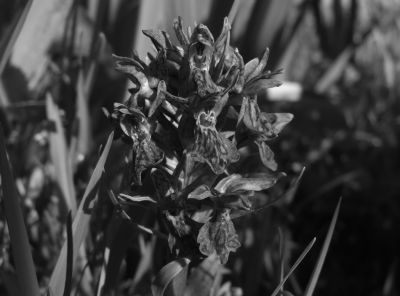

In [5]:
from utils.image_audio import load_image_gray, load_image_colour, show_image, load_sound, play_sound

def print_array(x):
    print("Shape: {shape}, dtype: '{dtype}'".format(shape=x.shape, dtype=x.dtype))
    
## Simple grayscale image
img = load_image_gray("imgs/orchid.png")
print_array(img)
show_image(img)

In [6]:
## Audio example
snd = load_sound("sounds/guitar.wav")
print_array(snd)

# we can work out how many seconds duration the sound will be by the shape of the array
# if we know the sampling rate (here, it's 44.1Khz)
print(("Duration will be: {secs:.2f} seconds ".format(secs=snd.shape[0] / 44100.0)))
play_sound(snd)

Shape: (223344,), dtype: 'float64'
Duration will be: 5.06 seconds 


c:\conda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


### Tabular Data
Many other data can be naturally thought of as arrays. For example, a very common structure is a spreadsheet like arrangement of data in tables, with rows and columns.
Each row is an **observation**, and each column is a **variable**.

For example, there is monthly historical data of the sunspot activity for the last ~250 years. It is in a format:

    index    year     sunspots
    1        1749.0    58
    2        1749.08   62.6
    3        1749.17   70.0
    
    ...
    
  
    


In [7]:
# this just turns off scientific notation, so the output looks sensible!
np.set_printoptions(suppress=True) 

# load and print
sunspots = np.loadtxt("data/sunspots.csv", delimiter=',')
print_array(sunspots)
print(sunspots)


Shape: (2820, 3), dtype: 'float64'
[[   1.         1749.           58.        ]
 [   2.         1749.08333333   62.6       ]
 [   3.         1749.16666667   70.        ]
 ...
 [2818.         1983.75         55.8       ]
 [2819.         1983.83333334   33.3       ]
 [2820.         1983.91666667   33.4       ]]


As we will see in detail later, we can for example plot this data array in one go:

Text(0,0.5,'No. of sunspots')

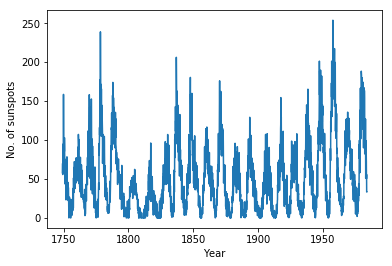

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(sunspots[:,1], sunspots[:,2])
ax.set_xlabel("Year")
ax.set_ylabel("No. of sunspots")

Text(0,0.5,'Amplitude (normalised)')

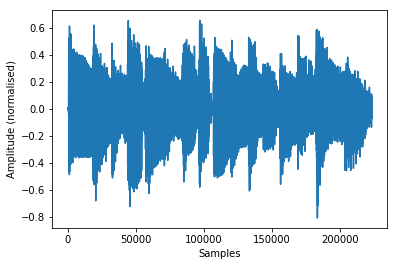

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(snd)
ax.set_xlabel("Samples")
ax.set_ylabel("Amplitude (normalised)")